# E5 Advanced geospatial plotting 

In [2]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('chicago_data.csv', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'chicago_data.csv'

In [4]:
from pathlib import Path
import pandas as pd

# Base project folder relative to Desktop
project_root = Path.home() / "Desktop" / "Divvy-"

# CSV inside the Data folder
csv_path = project_root / "Data" / "chicago_data.csv"

# Load CSV
df = pd.read_csv(csv_path, index_col=0)

# Quick check
print(df.head())

    trip_id           start_time             end_time  bikeid tripduration  \
0  17536702  2018-01-01 00:12:00  2018-01-01 00:17:23    3304        323.0   
1  17536703  2018-01-01 00:41:35  2018-01-01 00:47:52    5367        377.0   
2  17536704  2018-01-01 00:44:46  2018-01-01 01:33:10    4599      2,904.0   
3  17536705  2018-01-01 00:53:10  2018-01-01 01:05:37    2302        747.0   
4  17536706  2018-01-01 00:53:37  2018-01-01 00:56:40    3696        183.0   

   from_station_id            from_station_name  to_station_id  \
0               69       Damen Ave & Pierce Ave            159   
1              253  Winthrop Ave & Lawrence Ave            325   
2               98   LaSalle St & Washington St            509   
3              125         Rush St & Hubbard St            364   
4              129    Blue Island Ave & 18th St            205   

                  to_station_name    usertype gender  birthyear        date  \
0       Claremont Ave & Hirsch St  Subscriber   Male   

## Data preprocessing

In [5]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['from_station_name', 'to_station_name'])['value'].count().reset_index()

In [6]:
df_group

,from_station_name,to_station_name,value
0,2112 W Peterson Ave,2112 W Peterson Ave,14
1,2112 W Peterson Ave,Ashland Ave & Belle Plaine Ave,1
2,2112 W Peterson Ave,Avondale Ave & Irving Park Rd,1
3,2112 W Peterson Ave,Benson Ave & Church St,2
4,2112 W Peterson Ave,Broadway & Argyle St,2
...,...,...,...
113674,Yates Blvd & 75th St,South Shore Dr & 74th St,2
113675,Yates Blvd & 75th St,Stony Island Ave & 71st St,2
113676,Yates Blvd & 75th St,Stony Island Ave & 75th St,3
113677,Yates Blvd & 75th St,Woodlawn Ave & 55th St,2


In [7]:
print(df_group['value'].sum())
print(df.shape)

3603082
(3603082, 16)


In [9]:
df_group['value'].describe()

count    113679.000000
mean         31.695230
std         104.023444
min           1.000000
25%           2.000000
50%           6.000000
75%          23.000000
max        8858.000000
Name: value, dtype: float64

### Some exploratory analysis into the trips

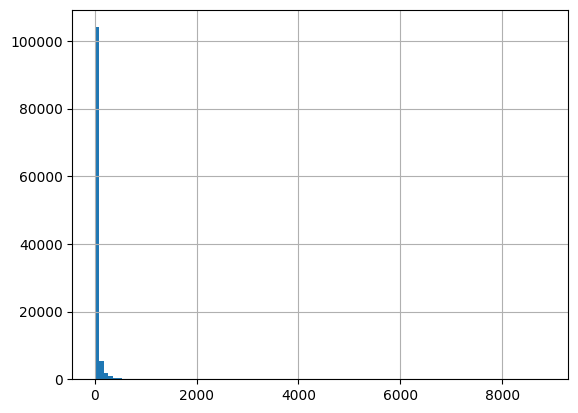

In [10]:
df_group['value'].hist(bins = 100)
plt.show()

[]

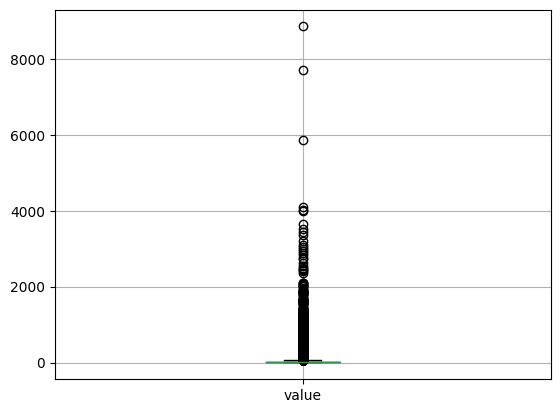

In [11]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [12]:
df_group['value'].sort_index().value_counts()

value
1       23427
2       13274
3        8409
4        6215
5        4777
        ...  
845         1
940         1
1396        1
1366        1
1397        1
Name: count, Length: 944, dtype: int64

In [13]:
df_group.to_csv('df_groupby_final.csv')

In [12]:
df_group.head()

,from_station_name,to_station_name,value
0,2112 W Peterson Ave,2112 W Peterson Ave,14
1,2112 W Peterson Ave,Ashland Ave & Belle Plaine Ave,1
2,2112 W Peterson Ave,Avondale Ave & Irving Park Rd,1
3,2112 W Peterson Ave,Benson Ave & Church St,2
4,2112 W Peterson Ave,Broadway & Argyle St,2


In [13]:
df_group.rename(columns = {'from_station_name':'start_station_name','to_station_name' : 'end_station_name',
                          'value': 'trips'}, inplace = True)

## Merge data to create latitude and longitude - only for Chicago

#### Import location data - only for Chicago

In [14]:
# Load location data

df_stations = pd.read_csv("Divvy_Locations.csv", index_col = 0)

# Source: https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq

In [15]:
df_stations.head()

,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
ID,,,,,,,
1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)"
641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.914166,-87.716755,"(41.914166, -87.716755)"
1683527931525155814,Public Rack - Cornell Ave & 87th Pl,1,1,In Service,41.736881,-87.583146,"(41.73688127, -87.58314552)"
367,Racine Ave & 35th St,15,15,In Service,41.830689,-87.656211,"(41.83068856472101, -87.65621066093445)"
1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,2,2,In Service,42.011865,-87.701317,"(42.011865, -87.701317)"


In [16]:
df_stations['start_station_name'] = df_stations['Station Name']

In [17]:
df_stations.head()

,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,start_station_name
ID,,,,,,,,
1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)",Troy St & Jackson Blvd
641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.914166,-87.716755,"(41.914166, -87.716755)",Central Park Ave & Bloomingdale Ave
1683527931525155814,Public Rack - Cornell Ave & 87th Pl,1,1,In Service,41.736881,-87.583146,"(41.73688127, -87.58314552)",Public Rack - Cornell Ave & 87th Pl
367,Racine Ave & 35th St,15,15,In Service,41.830689,-87.656211,"(41.83068856472101, -87.65621066093445)",Racine Ave & 35th St
1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,2,2,In Service,42.011865,-87.701317,"(42.011865, -87.701317)",Public Rack - Francisco Ave & Touhy Ave


In [18]:
df_stations.rename(columns = {'Station Name': 'end_station_name'}, inplace = True)

In [19]:
df_stations.reset_index(inplace = True)

In [20]:
df_stations = df_stations[['end_station_name', 'start_station_name', 'Latitude', 'Longitude']]

In [21]:
df_stations

,end_station_name,start_station_name,Latitude,Longitude
0,Troy St & Jackson Blvd,Troy St & Jackson Blvd,41.877505,-87.704850
1,Central Park Ave & Bloomingdale Ave,Central Park Ave & Bloomingdale Ave,41.914166,-87.716755
2,Public Rack - Cornell Ave & 87th Pl,Public Rack - Cornell Ave & 87th Pl,41.736881,-87.583146
3,Racine Ave & 35th St,Racine Ave & 35th St,41.830689,-87.656211
4,Public Rack - Francisco Ave & Touhy Ave,Public Rack - Francisco Ave & Touhy Ave,42.011865,-87.701317
...,...,...,...,...
1411,Sheffield Ave & Kingsbury St,Sheffield Ave & Kingsbury St,41.910522,-87.653106
1412,Ogden Ave & Chicago Ave,Ogden Ave & Chicago Ave,41.896362,-87.654061
1413,Baltimore Ave & 87th St,Baltimore Ave & 87th St,41.737336,-87.548515
1414,Ewing Ave & Burnham Greenway,Ewing Ave & Burnham Greenway,41.712749,-87.534814


##### _By start station_

In [22]:
df_m = df_group.merge(df_stations, how = 'outer', on = "start_station_name", indicator = 'merge_flag')

In [23]:
df_m['merge_flag'].value_counts(dropna = False)

both          100331
left_only      13348
right_only       875
Name: merge_flag, dtype: int64

In [24]:
df_m = df_m[df_m['merge_flag'] =='both']

In [25]:
df_m.shape

(100331, 7)

In [26]:
df_m.head()

,start_station_name,end_station_name_x,trips,end_station_name_y,Latitude,Longitude,merge_flag
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,2112 W Peterson Ave,41.991178,-87.683593,both
1,2112 W Peterson Ave,Ashland Ave & Belle Plaine Ave,1.0,2112 W Peterson Ave,41.991178,-87.683593,both
2,2112 W Peterson Ave,Avondale Ave & Irving Park Rd,1.0,2112 W Peterson Ave,41.991178,-87.683593,both
3,2112 W Peterson Ave,Benson Ave & Church St,2.0,2112 W Peterson Ave,41.991178,-87.683593,both
4,2112 W Peterson Ave,Broadway & Argyle St,2.0,2112 W Peterson Ave,41.991178,-87.683593,both


In [27]:
df_m.drop(columns = {'end_station_name_y'}, inplace = True)

In [28]:
df_m.rename(columns = {'end_station_name_x' : 'end_station_name'}, inplace = True)

##### _By end station_

In [29]:
df_final = df_m.merge(df_stations, how = 'outer', on = "end_station_name", indicator = 'merge_flag_2')

In [30]:
df_final['merge_flag_2'].value_counts(dropna = False)

both          88704
left_only     11627
right_only      877
Name: merge_flag_2, dtype: int64

In [31]:
df_final.head()

,start_station_name_x,end_station_name,trips,Latitude_x,Longitude_x,merge_flag,start_station_name_y,Latitude_y,Longitude_y,merge_flag_2
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,41.991178,-87.683593,both,2112 W Peterson Ave,41.991178,-87.683593,both
1,Ashland Ave & Belle Plaine Ave,2112 W Peterson Ave,1.0,41.956057,-87.668835,both,2112 W Peterson Ave,41.991178,-87.683593,both
2,Avondale Ave & Irving Park Rd,2112 W Peterson Ave,1.0,41.953393,-87.732002,both,2112 W Peterson Ave,41.991178,-87.683593,both
3,Broadway & Barry Ave,2112 W Peterson Ave,5.0,41.937582,-87.644098,both,2112 W Peterson Ave,41.991178,-87.683593,both
4,Broadway & Berwyn Ave,2112 W Peterson Ave,6.0,41.978353,-87.659753,both,2112 W Peterson Ave,41.991178,-87.683593,both


In [32]:
df_final = df_final[df_final['merge_flag_2'] =='both']

In [33]:
df_final.drop(columns = {'start_station_name_y', 'merge_flag', 'merge_flag_2'}, inplace = True)

In [34]:
df_final.rename(columns = {'start_station_name_x' : 'start_station_name'}, inplace = True)

In [35]:
df_final.head()

,start_station_name,end_station_name,trips,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,41.991178,-87.683593,41.991178,-87.683593
1,Ashland Ave & Belle Plaine Ave,2112 W Peterson Ave,1.0,41.956057,-87.668835,41.991178,-87.683593
2,Avondale Ave & Irving Park Rd,2112 W Peterson Ave,1.0,41.953393,-87.732002,41.991178,-87.683593
3,Broadway & Barry Ave,2112 W Peterson Ave,5.0,41.937582,-87.644098,41.991178,-87.683593
4,Broadway & Berwyn Ave,2112 W Peterson Ave,6.0,41.978353,-87.659753,41.991178,-87.683593


In [37]:
import gc # this is garbage collector - speeds up performance
gc.collect()

9716

In [38]:
df_final.head()

,start_station_name,end_station_name,trips,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,41.991178,-87.683593,41.991178,-87.683593
1,Ashland Ave & Belle Plaine Ave,2112 W Peterson Ave,1.0,41.956057,-87.668835,41.991178,-87.683593
2,Avondale Ave & Irving Park Rd,2112 W Peterson Ave,1.0,41.953393,-87.732002,41.991178,-87.683593
3,Broadway & Barry Ave,2112 W Peterson Ave,5.0,41.937582,-87.644098,41.991178,-87.683593
4,Broadway & Berwyn Ave,2112 W Peterson Ave,6.0,41.978353,-87.659753,41.991178,-87.683593


In [39]:
df_final.rename(columns = {'Latitude_x' : 'start_lat', 'Longitude_x' : 'start_lon', 
       'Latitude_y' : 'end_lat', 'Longitude_y' : 'end_lon',}, inplace = True)

## PLot the map

In [40]:
df_final.to_csv('df_final_locations_for_map.csv')

In [42]:
# Create KeplerGl instance

m = KeplerGl(height = 700, data={"data_1": df_final})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                          start_station_name        end_station_name  trips  \
0      …

In [43]:
config = m.config

In [ ]:
config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '1hzmdfg',
     'type': 'point',
     'config': {'dataId': 'data_1',
      'label': 'start',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'start_lat', 'lng': 'start_lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
     

In [48]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [47]:
m.save_to_html(file_name = 'Divvy Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to Divvy Bike Trips Aggregated.html!
